## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Data preparation
#### 4. Hierarchical clustering
#### 5. Principal Component Analysis (PCA)
#### 6. Export data

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Maching Learning\Climate_Win'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Maching Learning\\Climate_Win'

In [4]:
# Import climatewin original data
df_cw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [5]:
# Check output
df_cw.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
# Check shape
df_cw.shape

(22950, 170)

In [7]:
# Import climatewin prediction data
df_cw_pred = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
# Check output
df_cw_pred.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check shape
df_cw_pred.shape

(22950, 16)

## 3. Data preparation

In [66]:
#Reduce your dataset to a single year
dfyear_2020 = df_cw[df_cw['DATE'].astype(str).str.startswith('2020')] #<-----INSERT YEAR HERE
dfyear_2020

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,20200101,1,0,1.7,0.87,1.0339,0.64,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21916,20200102,1,0,3.1,0.87,1.0316,0.65,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21917,20200103,1,7,2.2,0.81,1.0287,0.41,0.01,0,1.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21918,20200104,1,6,2.3,0.79,1.0341,0.29,0.14,0,0.9,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21919,20200105,1,0,0.9,0.85,1.0367,0.67,0.00,0,6.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,12,8,4.8,0.70,1.0007,0.26,0.41,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22277,20201228,12,7,3.5,0.74,0.9828,0.26,0.11,0,0.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22278,20201229,12,6,3.5,0.74,0.9945,0.25,0.22,0,0.2,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22279,20201230,12,6,1.5,0.85,1.0069,0.32,0.04,0,0.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [67]:
# Scaling dfyear_2020
scaler = StandardScaler()
dfyear2020_scaled = pd.DataFrame(scaler.fit_transform(dfyear_2020))

In [68]:
# Check output for scaled data
dfyear2020_scaled

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-1.639546,-1.597591,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,-1.636649,-1.597591,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,-1.633753,-1.597591,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,-1.630857,-1.597591,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,-1.627961,-1.597591,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.621457,1.589675,1.280826,2.661835,-0.037428,-2.073236,-1.132824,0.592589,0.0,-1.193598,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
362,1.624353,1.589675,0.875655,1.410846,0.254036,-4.220886,-1.132824,-0.196859,0.0,-1.108738,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
363,1.627249,1.589675,0.470485,1.410846,0.254036,-2.817115,-1.143918,0.092605,0.0,-1.151168,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
364,1.630145,1.589675,0.470485,-0.513752,1.055563,-1.329357,-1.066258,-0.381063,0.0,-1.129953,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


In [69]:
# Copying columns headers from original temp dataset, pasting to scaled

columns=dfyear_2020.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [70]:
# Inserting copied columns name to scaled data
dfyear2020_scaled.columns = columns

In [71]:
# Check dfyear2020_scaled output
dfyear2020_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.639546,-1.597591,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,-1.636649,-1.597591,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,-1.633753,-1.597591,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,-1.630857,-1.597591,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,-1.627961,-1.597591,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.621457,1.589675,1.280826,2.661835,-0.037428,-2.073236,-1.132824,0.592589,0.0,-1.193598,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
362,1.624353,1.589675,0.875655,1.410846,0.254036,-4.220886,-1.132824,-0.196859,0.0,-1.108738,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
363,1.627249,1.589675,0.470485,1.410846,0.254036,-2.817115,-1.143918,0.092605,0.0,-1.151168,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
364,1.630145,1.589675,0.470485,-0.513752,1.055563,-1.329357,-1.066258,-0.381063,0.0,-1.129953,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


In [73]:
# Dropping date and month for scaled data
dfyear2020_scaled = dfyear2020_scaled.drop(['DATE','MONTH'], axis=1)

In [78]:
dfyear2020_scaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,-1.822856,-1.817976,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,-1.750121,-1.581078,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,-0.993682,-1.107282,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,-0.891853,-0.853462,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,-1.517371,-1.496471,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.280826,2.661835,-0.037428,-2.073236,-1.132824,0.592589,0.0,-1.193598,-1.517371,-1.851819,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
362,0.875655,1.410846,0.254036,-4.220886,-1.132824,-0.196859,0.0,-1.108738,-1.095510,-0.921147,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
363,0.470485,1.410846,0.254036,-2.817115,-1.143918,0.092605,0.0,-1.151168,-1.124604,-0.971911,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
364,0.470485,-0.513752,1.055563,-1.329357,-1.066258,-0.381063,0.0,-1.129953,-1.386448,-1.158045,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


In [97]:
# Combined unscaled date column with scaled data
dfyear2020_scaled = pd.concat([dfyear_2020[['DATE','MONTH']].reset_index(),dfyear2020_scaled], axis=1)

In [101]:
dfyear2020_scaled.drop(['index'], axis=1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,20200101,1,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,20200102,1,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,20200103,1,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,20200104,1,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,20200105,1,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,20201227,12,1.280826,2.661835,-0.037428,-2.073236,-1.132824,0.592589,0.0,-1.193598,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
362,20201228,12,0.875655,1.410846,0.254036,-4.220886,-1.132824,-0.196859,0.0,-1.108738,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
363,20201229,12,0.470485,1.410846,0.254036,-2.817115,-1.143918,0.092605,0.0,-1.151168,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
364,20201230,12,0.470485,-0.513752,1.055563,-1.329357,-1.066258,-0.381063,0.0,-1.129953,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


## 4. Hierarchical clustering

### 4.1 Hierarchical Clustering - Single

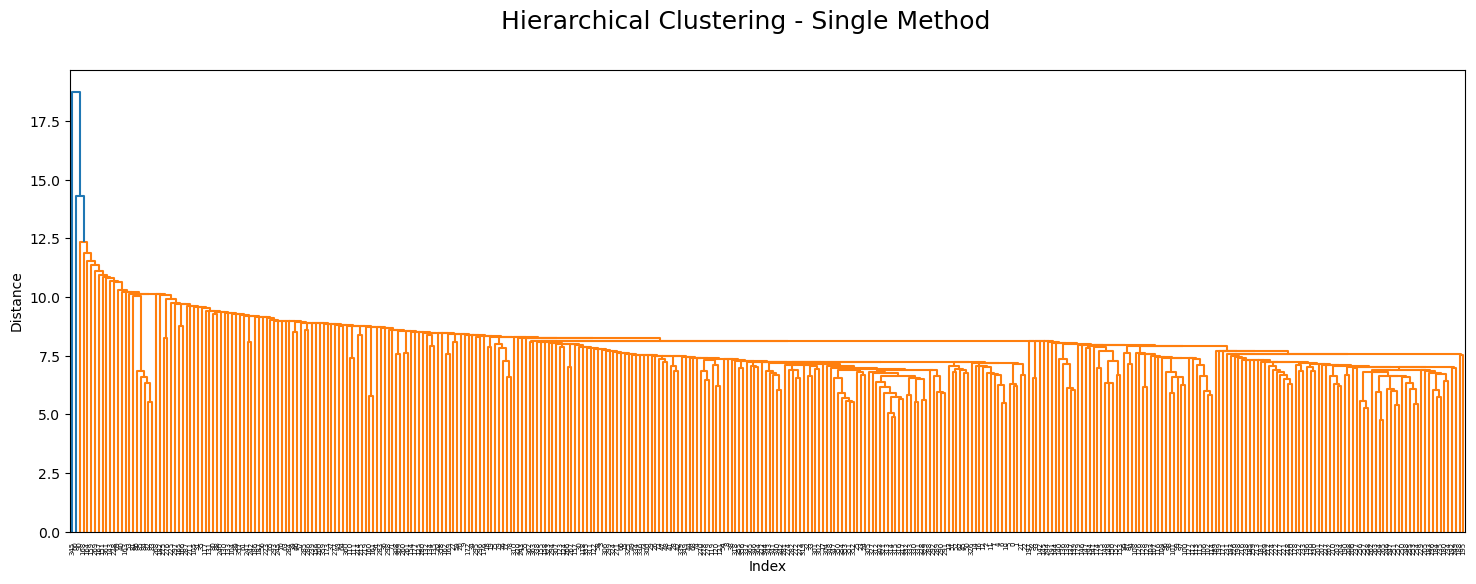

In [102]:
# Hierarchical Clustering - single method

dfyear2020_single = linkage(dfyear2020_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")
plt.figure(figsize=(18,6))
dendrogram(dfyear2020_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering - Single Method",fontsize=18)
plt.show()

### 4.2 Hierarchical Clustering - Complete Method

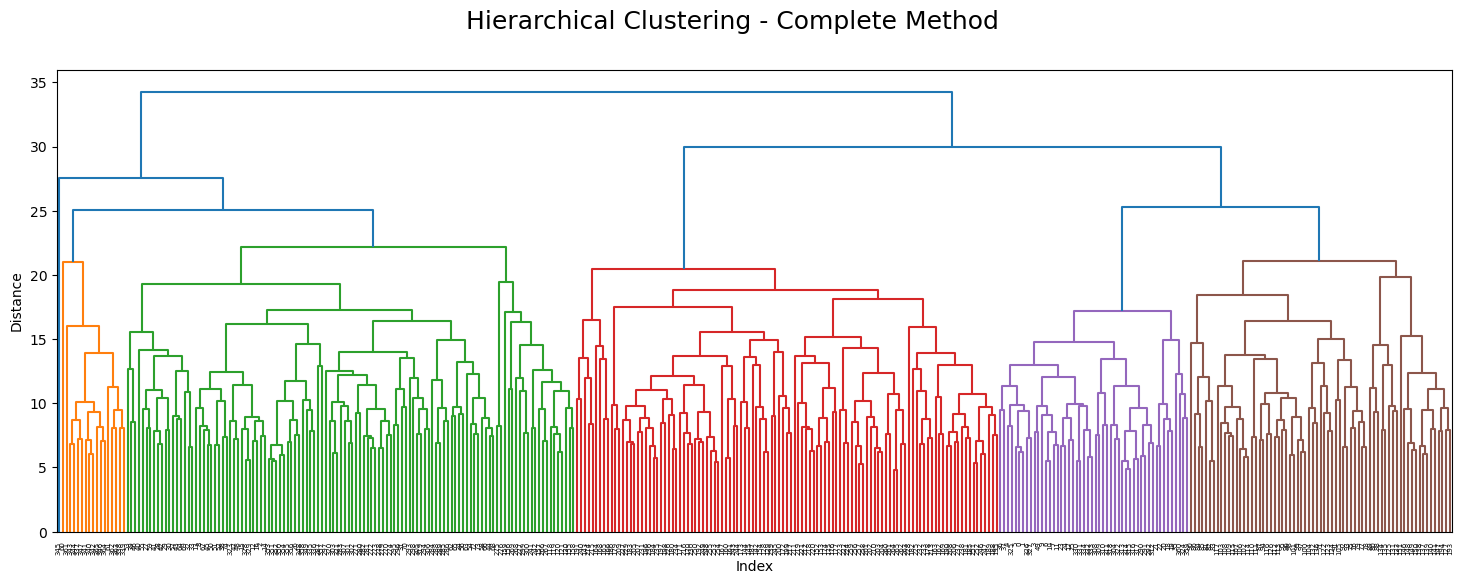

In [103]:
# Hierarchical Clustering - complete method

dfyear2020_complete = linkage(dfyear2020_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dfyear2020_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering - Complete Method",fontsize=18)
plt.show()

### 4.3 Hierarchical Clustering - Average Method

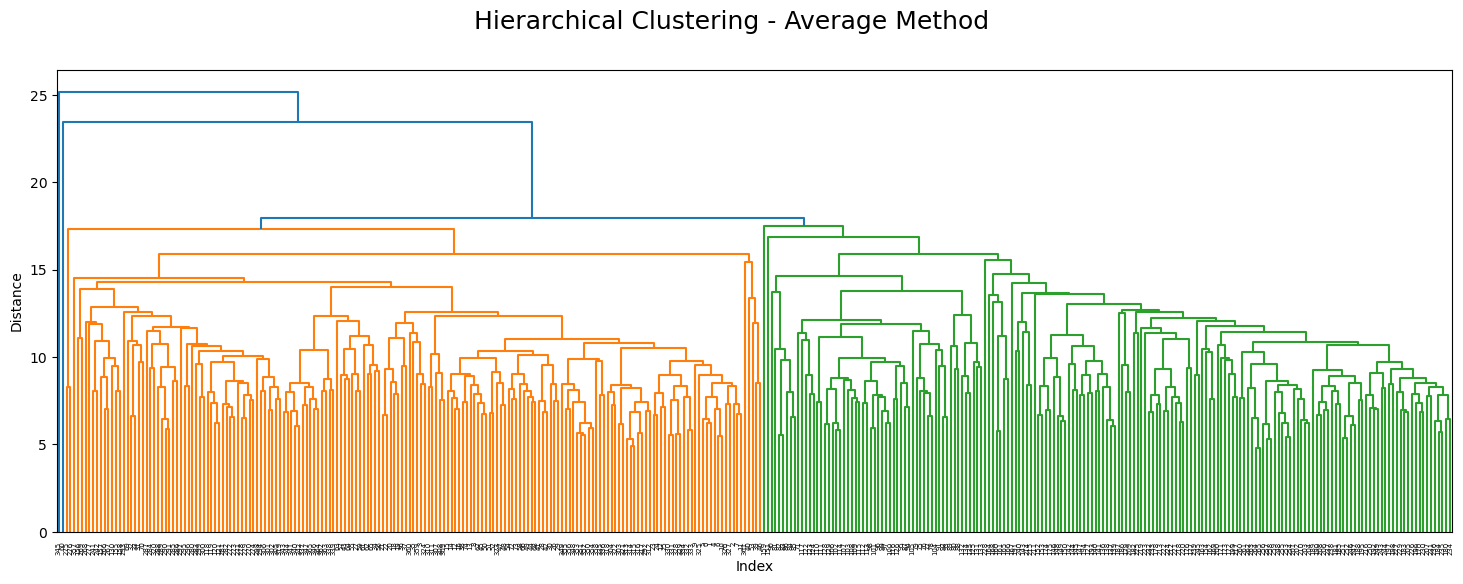

In [104]:
# Hierarchical Clustering - average method

dfyear2020_avg = linkage(dfyear2020_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")
plt.figure(figsize=(18,6))
dendrogram(dfyear2020_avg, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering - Average Method",fontsize=18)
plt.show()

### 4.4 Hierarchical Clustering - Ward Method

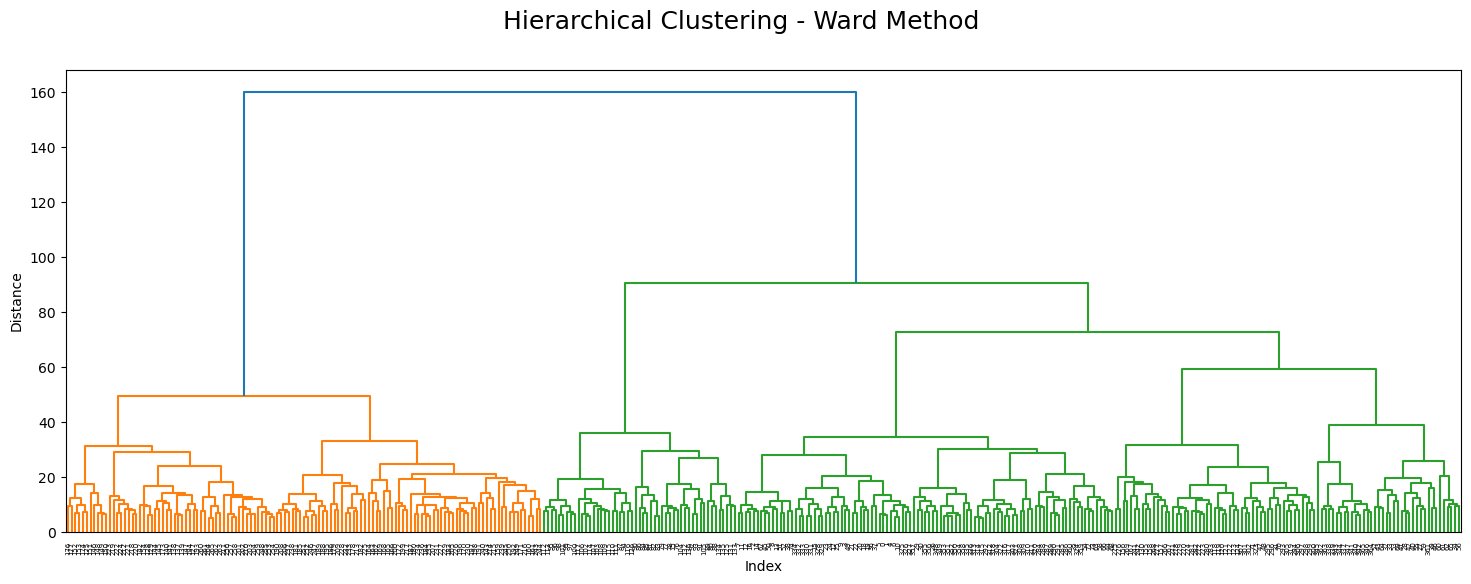

In [105]:
# Hierarchical Clustering - ward method

dfyear2020_ward = linkage(dfyear2020_scaled.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(dfyear2020_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering - Ward Method",fontsize=18)
plt.show()

In [106]:
dfyear2020_scaled_SM=dfyear2020_scaled.copy()

dfyear2020_scaled_SM['clust2']=fcluster(dfyear2020_ward,2, criterion='maxclust')
dfyear2020_scaled_SM.head()

,index,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2
0,21915,20200101,1,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,...,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0,2
1,21916,20200102,1,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,...,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0,2
2,21917,20200103,1,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,...,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0,2
3,21918,20200104,1,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,...,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0,2
4,21919,20200105,1,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,...,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0,2


clust2
2    241
1    125
Name: count, dtype: int64

## 5. Principal Component Analysis (PCA)

In [20]:
pca_cols = ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']
df_pca = dfyear2020_scaled[pca_cols]
df_pca

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,-1.822856,-1.817976,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
1,-1.960538,1.025927,1.201295,1.634160,-0.700149,-0.486323,0.0,0.185369,-1.750121,-1.581078,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
2,0.875655,0.159857,0.764099,1.286217,-0.966410,-0.460008,0.0,-0.854160,-0.993682,-1.107282,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
3,0.470485,0.256087,0.618367,1.934111,-1.099541,-0.117914,0.0,-1.002664,-0.891853,-0.853462,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
4,-1.960538,-1.091132,1.055563,2.246060,-0.677960,-0.486323,0.0,0.206584,-1.517371,-1.496471,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.280826,2.661835,-0.037428,-2.073236,-1.132824,0.592589,0.0,-1.193598,-1.517371,-1.851819,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
362,0.875655,1.410846,0.254036,-4.220886,-1.132824,-0.196859,0.0,-1.108738,-1.095510,-0.921147,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
363,0.470485,1.410846,0.254036,-2.817115,-1.143918,0.092605,0.0,-1.151168,-1.124604,-0.971911,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0
364,0.470485,-0.513752,1.055563,-1.329357,-1.066258,-0.381063,0.0,-1.129953,-1.386448,-1.158045,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,8.881784e-16,-3.552714e-15,0.0,0.0


In [21]:
#Run the PCA model, reducing to 18 (Number of stations)
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(df_pca)

In [22]:
# Check output array
principalComponents

array([[-10.13544663,   5.62230137,  -4.89586883, ...,  -1.17396964,
          1.09698246,  -0.22003063],
       [ -9.90805115,   3.08094688,  -4.89302453, ...,  -0.74299342,
         -0.41098461,  -1.28962843],
       [ -9.08806721,   1.12673863,  -3.08169528, ...,   0.58896695,
         -1.08410072,   0.07842915],
       ...,
       [-10.2409155 ,  -6.08227433,   5.70319487, ...,   0.05241282,
         -1.2896256 ,  -1.31032389],
       [-10.05452529,  -3.36788068,   2.6921179 , ...,   1.55941778,
          0.51920945,   0.72935759],
       [-11.2486083 ,  -2.24686407,   1.81952731, ...,   0.48386238,
         -0.40716279,   0.19132886]])

In [23]:
#Make a dataframe of the new components
df_pca_final = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18'])

In [24]:
#Check output
df_pca_final

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-10.135447,5.622301,-4.895869,-1.407113,0.005848,1.234372,-1.285607,-1.016311,0.939748,1.242748,-0.537645,2.359712,-0.350244,-0.760012,-0.619173,-1.173970,1.096982,-0.220031
1,-9.908051,3.080947,-4.893025,0.032389,0.279812,0.181329,-0.806917,-0.179138,0.871070,0.156134,0.134783,2.092358,-0.749069,0.444281,-2.207232,-0.742993,-0.410985,-1.289628
2,-9.088067,1.126739,-3.081695,0.589431,1.669827,-1.523092,1.901898,0.443541,0.248365,0.045382,1.700090,1.525423,-0.282282,-0.849441,-1.959454,0.588967,-1.084101,0.078429
3,-9.314776,1.911806,-2.287193,-4.131599,4.213558,0.028859,-0.058156,0.071555,0.414695,-1.335190,1.414690,0.765953,-0.406923,1.087840,0.234291,-0.020662,-0.699457,-0.212741
4,-9.391231,4.033870,-4.636769,-2.307070,2.332126,0.775145,-3.194744,0.430945,-0.418871,1.009820,-1.109328,0.197769,-1.317534,-0.980160,1.214384,0.017601,-0.936863,-1.104279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-12.378178,-6.193485,4.133918,7.469932,-1.950980,-2.251614,-1.089106,2.949408,1.110212,-0.521557,-0.536410,0.839800,-0.220432,-0.209067,-0.676591,1.485353,-0.217121,1.191038
362,-10.985487,-8.609840,8.206003,0.749607,-4.908152,3.105341,-3.556776,0.100039,1.693873,0.028488,0.790380,2.387487,-1.132420,-0.096872,-1.023933,0.726607,-0.603785,-0.846060
363,-10.240915,-6.082274,5.703195,0.304677,-3.231051,2.791025,-1.757528,-1.209842,1.510949,-1.628218,1.012628,1.019086,-0.025383,1.692149,-1.330884,0.052413,-1.289626,-1.310324
364,-10.054525,-3.367881,2.692118,-0.757340,-1.595448,2.032824,-1.935997,-0.332252,-0.636519,-1.333597,1.419159,1.514114,1.166135,0.289234,-0.709596,1.559418,0.519209,0.729358


## 6. Export data

In [25]:
df_pca_final.to_csv(os.path.join(path, '02 Data', 'Prepared Data', '2020_pca.csv'), index=False)